In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

# Robust MLR and Simple Dense

In [61]:
# metrics for robust and simple dense models
df_rreg_results = pd.read_csv('../prediction_results/robust_regression.csv')
df_rreg_results['date'] = pd.to_datetime(df_rreg_results['date'], format = '%Y-%m-%d %H:%M') # 
df_rreg_results.set_index('date', inplace=True) # date column as index
df_rreg_results = df_rreg_results[['NO$_2$ observed', 'NO$_2$ predicted']] # change place only for this df

df_simple_dense_results = pd.read_csv('../prediction_results/dense_predictions.csv')
df_simple_dense_results['date'] = pd.to_datetime(df_simple_dense_results['date'], format = '%Y-%m-%d %H:%M') # 
df_simple_dense_results.set_index('date', inplace=True) # date column as index

print('Robust\n------')
print('MSE:', mean_squared_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(3))
print('RMSE', np.sqrt(mean_squared_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted'])).round(3))
print('MAE:', mean_absolute_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(3))
print('ME:',np.mean(df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted']).round(3))
print('MAPE:', mean_absolute_percentage_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(3))

print('\nSimple dense\n------------')
print('MSE:', mean_squared_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(3))
print('ME:',np.mean(df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(3))

Robust
------
MSE: 12.341
RMSE 3.513
MAE: 1.995
ME: 0.482
MAPE: 0.2

Simple dense
------------
MSE: 10.089
RMSE 3.176
MAE 1.925
ME: -0.24
MAPE 0.222


Robust MLR
        lb_stat      lb_pvalue     bp_stat      bp_pvalue
10  757.295651  3.109348e-156  756.625334  4.332040e-156

Simple Dense 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  483.141454  1.763409e-97  482.716372  2.173380e-97


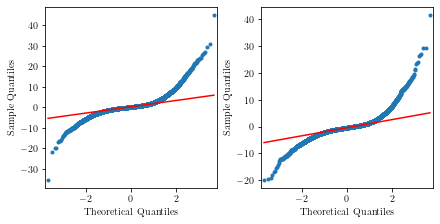

In [106]:
df_rreg_results['error'] = df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted']
print('Robust MLR\n',sm.stats.acorr_ljungbox(df_rreg_results['error'].values, lags=[10], boxpierce=True, return_df=True))

df_simple_dense_results['error'] = df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted']
print('\nSimple Dense \n',sm.stats.acorr_ljungbox(df_simple_dense_results['error'].values, lags=[10], boxpierce=True, return_df=True))


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (6, 3))

sm.qqplot(df_rreg_results['error'], line='q', marker=".", ax=ax1)
sm.qqplot(df_simple_dense_results['error'], line='q', marker=".", ax=ax2)

plt.show()

# Dense (6, 12, and 24 h)

In [75]:
# metrics for dense fitted with rolling windows
df_dense_6h_results = pd.read_csv('../prediction_results/dense_6_predictions.csv')
df_dense_6h_results['date'] = pd.to_datetime(df_dense_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_6h_results.set_index('date', inplace=True) # date column as index

print('Dense 6h\n--------')
print('MSE',mean_squared_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_dense_6h_results['NO$_2$ observed'] - df_dense_6h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(3))

df_dense_12h_results = pd.read_csv('../prediction_results/dense_12_predictions.csv')
df_dense_12h_results['date'] = pd.to_datetime(df_dense_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_12h_results.set_index('date', inplace=True) # date column as index

print('\nDense 12h\n--------')
print('MSE',mean_squared_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_dense_12h_results['NO$_2$ observed'] - df_dense_12h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))

Dense 6h
--------
MSE 10.412
RMSE 3.227
MAE 2.053
ME -0.321
MAPE 0.26

Dense 12h
--------
MSE 10.441
RMSE 3.231
MAE 2.065
ME -0.053
MAPE 0.255


# LSTM

In [53]:
df_lstm_6h_results = pd.read_csv('../prediction_results/LSTM_6h_predictions.csv')
df_lstm_6h_results['date'] = pd.to_datetime(df_lstm_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_6h_results.set_index('date', inplace=True) # date column as index

df_lstm_12h_results = pd.read_csv('../prediction_results/LSTM_12h_predictions.csv')
df_lstm_12h_results['date'] = pd.to_datetime(df_lstm_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_12h_results.set_index('date', inplace=True) # date column as index

df_lstm_24h_results = pd.read_csv('../prediction_results/LSTM_24h_predictions.csv')
df_lstm_24h_results['date'] = pd.to_datetime(df_lstm_24h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_24h_results.set_index('date', inplace=True) # date column as index

print('\nLSTM 6h \n-------')
print('MSE',mean_squared_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_lstm_6h_results['NO$_2$ observed'] - df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))

print('\nLSTM 12h \n-------')
print('MSE',mean_squared_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(3))

print('\nLSTM 24h \n-------')
print('MSE',mean_squared_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_lstm_24h_results['NO$_2$ observed'] - df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))


LSTM 6h 
-------
MSE 9.802
RMSE 3.131
MAE 1.895
ME 0.01
MAPE 0.219

LSTM 12h 
-------
MSE 9.621
RMSE 3.102
MAE 1.888
ME -0.075
MAPE 0.221

LSTM 24h 
-------
MSE 9.751
RMSE 3.123
MAE 1.904
ME -0.051
MAPE 0.225



LSTM 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  138.435905  8.813431e-25  138.337744  9.230949e-25


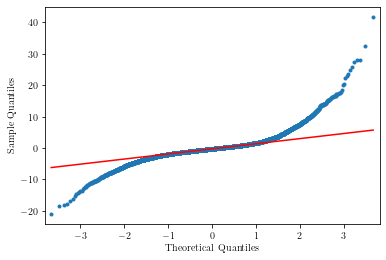

In [100]:
from statsmodels.graphics.tsaplots import plot_acf

df_lstm_12h_results['error'] = df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted']
sm.qqplot(df_lstm_12h_results['error'], line='q', marker=".")
print('\nLSTM \n',sm.stats.acorr_ljungbox(df_lstm_12h_results['error'].values, lags=[10], boxpierce=True, return_df=True))

In [54]:
# print('\nRNN')
# print(mean_squared_error(df_RNN_results['NO$_2$ observed'], df_RNN_results['NO$_2$ predicted']).round(3))
# print(np.sqrt(mean_squared_error(df_RNN_results['NO$_2$ observed'], df_RNN_results['NO$_2$ predicted'])).round(3))
# print(mean_absolute_percentage_error(df_RNN_results['NO$_2$ observed'], df_RNN_results['NO$_2$ predicted']).round(3))
# print(mean_absolute_error(df_RNN_results['NO$_2$ observed'], df_RNN_results['NO$_2$ predicted']).round(3))

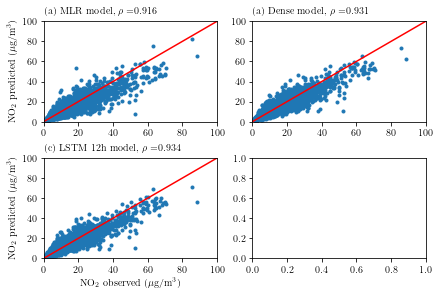

In [57]:
rho_robust = stats.pearsonr(df_rreg_results.iloc[:,0], df_rreg_results.iloc[:,1])
rho_simple_dense = stats.pearsonr(df_simple_dense_results.iloc[:,0], df_simple_dense_results.iloc[:,1])
# rho_dense = stats.pearsonr(df_dense_results.iloc[:,0], df_dense_results.iloc[:,1])
# rho_RNN = stats.pearsonr(df_RNN_results.iloc[:,0], df_RNN_results.iloc[:,1])
rho_LSTM = stats.pearsonr(df_lstm_12h_results.iloc[:,0], df_lstm_12h_results.iloc[:,1])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout=True, figsize=(6,4))
# fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(5.5, 2.5))

ax1.scatter(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted'], marker='.')
# ax1.set_xlabel('NO$_2$ (actual)')
ax1.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
#ax1.set_xlabel('NO$_2$ observed')
ax1.annotate(r'(a) MLR model, $\rho = $' + str(round(rho_robust[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax1.set_ylim(0.0, 100.0)
ax1.set_xlim(0.0, 100.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

ax2.scatter(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted'], marker='.')
# ax2.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
#ax2.set_xlabel('NO$_2$ observed')
ax2.annotate(r'(a) Dense model, $\rho = $' + str(round(rho_simple_dense[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax2.set_ylim(0.0, 100.0)
ax2.set_xlim(0.0, 100.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax2.transAxes
line.set_transform(transform)
ax2.add_line(line)

ax3.scatter(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted'], marker='.')
ax3.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
ax3.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
ax3.annotate(r'(c) LSTM 12h model, $\rho = $' + str(round(rho_LSTM[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax3.set_ylim(0.0, 100.0)
ax3.set_xlim(0.0, 100.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax3.transAxes
line.set_transform(transform)
ax3.add_line(line)

# ax4.scatter(df_lstm_results['NO$_2$ observed'], df_lstm_results['NO$_2$ predicted'], marker='.')
# ax4.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
# ax4.set_ylim(0.0, 100.0)
# ax4.set_xlim(0.0, 100.0)
# # ax4.set_ylabel('NO$_2$ predicted')
# ax4.annotate(r'(d) LSTM model, $\rho = $' + str(round(rho_LSTM[0],3)), xy=(0, 1.07), xycoords="axes fraction")
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# transform = ax4.transAxes
# line.set_transform(transform)
# ax4.add_line(line)

plt.savefig('../plots/correlations.pdf')

Text(0.5, 0, '')

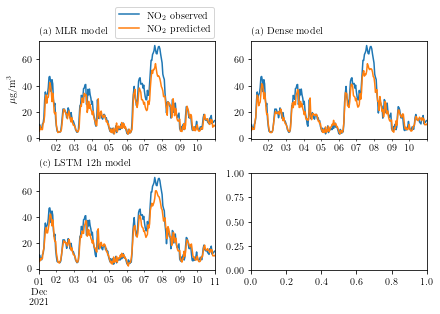

In [8]:
start = '2021-12-01 00:00:00'
end = '2021-12-11 00:00'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout=True, figsize=(6,4.25))

df_rreg_results[start:end].plot(ax=ax1)
ax1.annotate('(a) MLR model', xy=(0, 1.07), xycoords="axes fraction")
ax1.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax1.set_xlabel('')
ax1.set_ylabel('$\mu$g/m$^3$')
ax1.set_xticks([], major=True)

df_simple_dense_results[start:end].plot(ax=ax2)
ax2.annotate('(a) Dense model', xy=(0, 1.07), xycoords="axes fraction")
ax2.get_legend().remove()
ax2.set_xlabel('')
ax2.set_xticks([], major=True)

# df_dense_results[start:end].plot(ax=ax2)
# ax2.annotate('(b) Dense model', xy=(0, 1.07), xycoords="axes fraction")
# ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# ax2.get_legend().remove()
# ax2.set_xlabel('')
# ax2.set_xticks([], major=True)

# df_RNN_results[start:end].plot(ax=ax3)
# ax3.annotate('(c) RNN model', xy=(0, 1.07), xycoords="axes fraction")
# #ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# ax3.get_legend().remove()
# ax3.set_ylabel('$\mu$g/m$^3$')
# ax3.set_xlabel('')

df_lstm_12h_results[start:end].plot(ax=ax3)
ax3.annotate('(c) LSTM 12h model', xy=(0, 1.07), xycoords="axes fraction")
#ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax3.get_legend().remove()
ax3.set_xlabel('')

# plt.savefig('../plots/predictions.pdf')

In [9]:
def quality_function(O, P):
    a = 1e-1
    b = 1e2
    c = 1e3
    if (O <= 40 and P <= 40):
        I_40 = 1
    else:
        I_40 = 0
    if (O >= 65 and P >= 65):
        I_80 = 1
    else:
        I_80 = 0
    D = 1 + 0.5 * (np.sqrt(np.abs(O-40) + np.abs(P-40) + b*I_40 + c*I_80))
    return 1 - min(((a*np.abs(O-P))/D), 1)


def assign_quality(df):
    df['quality'] = 0
    for i in range(df.shape[0]):
        q = quality_function(df.iloc[i,0], df.iloc[i,1])
        if q > .8:
            df.iloc[i,2] = 5
        if q >= .6 and q < .8:
            df.iloc[i,2] = 4
        if q >= .4 and q < .6:
            df.iloc[i,2] = 3
        if q >= .2 and q < .4:
            df.iloc[i,2] = 3
        if q >=0 and q < .2:
            df.iloc[i,2] = 1
    return df



In [10]:
quality_rreg = assign_quality(df_rreg_results)
print('Robust regression\n-----------------')
print(np.sum(quality_rreg['quality'] == 1))
print(np.sum(quality_rreg['quality'] == 2))
print(np.sum(quality_rreg['quality'] == 3))
print(np.sum(quality_rreg['quality'] == 4))
print(np.sum(quality_rreg['quality'] == 5))

Robust regression
-----------------
3
0
60
95
8011


In [11]:
quality_simple_dense = assign_quality(df_simple_dense_results)
print('Simple dense\n------------')
print(np.sum(quality_simple_dense['quality'] == 1))
print(np.sum(quality_simple_dense['quality'] == 2))
print(np.sum(quality_simple_dense['quality'] == 3))
print(np.sum(quality_simple_dense['quality'] == 4))
print(np.sum(quality_simple_dense['quality'] == 5))

Simple dense
------------
1
0
38
93
8037


In [12]:
quality_lstm = assign_quality(df_lstm_6h_results)
print('LSTM 6h \n-------')
print(np.sum(df_lstm_6h_results['quality'] == 1))
print(np.sum(df_lstm_6h_results['quality'] == 2))
print(np.sum(df_lstm_6h_results['quality'] == 3))
print(np.sum(df_lstm_6h_results['quality'] == 4))
print(np.sum(df_lstm_6h_results['quality'] == 5))

LSTM 6h 
-------
1
0
34
97
8031


In [13]:
df_lstm_12h_results = assign_quality(df_lstm_12h_results)
print('LSTM 12h \n-------')
print(np.sum(df_lstm_12h_results['quality'] == 1))
print(np.sum(df_lstm_12h_results['quality'] == 2))
print(np.sum(df_lstm_12h_results['quality'] == 3))
print(np.sum(df_lstm_12h_results['quality'] == 4))
print(np.sum(df_lstm_12h_results['quality'] == 5))

LSTM 12h 
-------
1
0
32
89
8035


In [14]:
df_lstm_24h_results = assign_quality(df_lstm_24h_results)
print('LSTM 12h \n-------')
print(np.sum(df_lstm_24h_results['quality'] == 1))
print(np.sum(df_lstm_24h_results['quality'] == 2))
print(np.sum(df_lstm_24h_results['quality'] == 3))
print(np.sum(df_lstm_24h_results['quality'] == 4))
print(np.sum(df_lstm_24h_results['quality'] == 5))

LSTM 12h 
-------
1
0
35
92
8017
